In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255
print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(optimizer="adam",
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

In [18]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8604 - loss: 0.4854 - val_accuracy: 0.9572 - val_loss: 0.1386
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9534 - loss: 0.1566 - val_accuracy: 0.9703 - val_loss: 0.1005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9674 - loss: 0.1081 - val_accuracy: 0.9729 - val_loss: 0.0885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9727 - loss: 0.0880 - val_accuracy: 0.9756 - val_loss: 0.0769
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9747 - loss: 0.0765 - val_accuracy: 0.9769 - val_loss: 0.0733
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9791 - loss: 0.0661 - val_accuracy: 0.9789 - val_loss: 0.0726
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9825 - loss: 0.0554 - val_accuracy: 0.9778 - val_loss: 0.0725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9838 - loss: 0.0503 

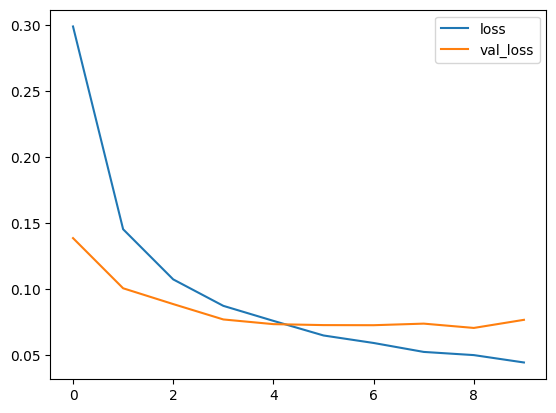

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

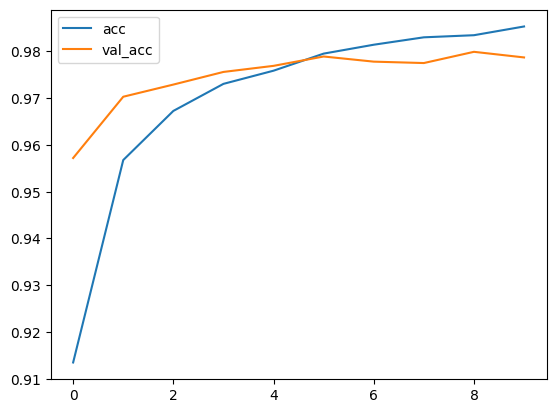

In [25]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
not normilized
[[ 968    1    1    0    1    3    2    0    1    3]
 [   0 1126    3    1    0    2    1    0    2    0]
 [   5    3 1005    3    3    0    2    7    3    1]
 [   0    0    2  986    0    6    0    5    2    9]
 [   0    0    2    1  955    0    4    4    0   16]
 [   2    0    0    8    2  873    1    1    2    3]
 [   3    3    2    1    3    8  938    0    0    0]
 [   1    3    9    1    1    0    0 1005    1    7]
 [   6    1    1    5    5    6    1    2  940    7]
 [   1    2    0    4    4    2    0    5    0  991]]


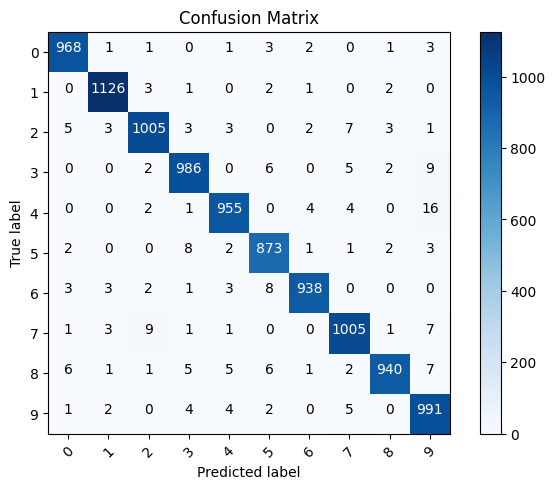

In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astypre('float') / cm.sum(axis=1)[: , np.newasxix]
    print('normalized')
  else:
    print('not normilized')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap= cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black' )

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'true label: 9 Predicted 5')

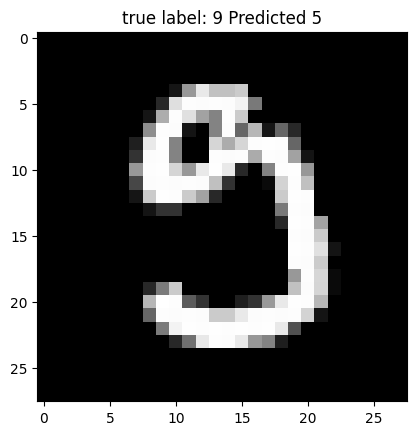

In [52]:
misclassificated_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassificated_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('true label: %s Predicted %s' %(y_test[i], p_test[i]))